In [ ]:
!unzip /content/drive/MyDrive/sreeedata.zip

Archive:  /content/drive/MyDrive/sreeedata.zip
  inflating: sreeedata/image (1).jpeg  
  inflating: sreeedata/image.jpeg    
  inflating: sreeedata/IMG_20211027_185720_997.jpg  
  inflating: sreeedata/IMG_20220101_143335_293.jpg  
  inflating: sreeedata/IMG_20220326_191933_103.jpg  
  inflating: sreeedata/IMG_20220718_094543.jpg  
  inflating: sreeedata/IMG_20220718_094603.jpg  
  inflating: sreeedata/IMG_20220718_094619.jpg  
  inflating: sreeedata/IMG_20220718_094633.jpg  
  inflating: sreeedata/IMG_20220718_094646.jpg  
  inflating: sreeedata/IMG_20220718_094657.jpg  
  inflating: sreeedata/IMG_20220718_094710.jpg  
  inflating: sreeedata/IMG_20220718_094724.jpg  
  inflating: sreeedata/IMG_20220718_094742.jpg  
  inflating: sreeedata/IMG_20220718_094801.jpg  
  inflating: sreeedata/IMG-20210815-WA0050.jpg  
  inflating: sreeedata/IMG-20210817-WA0005.jpg  
  inflating: sreeedata/IMG20211226165601.jpg  
  inflating: sreeedata/InShot_20210926_201655940.jpg  
  inflating: sreeedata/InS

In [ ]:
!unzip /content/drive/MyDrive/dl_dataset.zip

Archive:  /content/drive/MyDrive/dl_dataset.zip
  inflating: dl_dataset/img_1.jpg    
  inflating: dl_dataset/img_10.jpg   
  inflating: dl_dataset/img_11.jpg   
  inflating: dl_dataset/img_12.jpg   
  inflating: dl_dataset/img_13.jpg   
  inflating: dl_dataset/img_14.jpg   
  inflating: dl_dataset/img_15.jpg   
  inflating: dl_dataset/img_16.jpg   
  inflating: dl_dataset/img_17.jpg   
  inflating: dl_dataset/img_18.jpg   
  inflating: dl_dataset/img_19.jpg   
  inflating: dl_dataset/img_2.jpg    
  inflating: dl_dataset/img_20.jpg   
  inflating: dl_dataset/img_3.jpg    
  inflating: dl_dataset/img_4.jpg    
  inflating: dl_dataset/img_5.jpg    
  inflating: dl_dataset/img_6.jpg    
  inflating: dl_dataset/img_7.jpg    
  inflating: dl_dataset/img_8.jpg    
  inflating: dl_dataset/img_9.jpg    


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import Augmentor
# Passing the path of the image directory
p = Augmentor.Pipeline("/content/sreeedata")
  
# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(100)

Initialised with 25 image(s) found.
Output directory set to /content/sreeedata/output.

Processing <PIL.Image.Image image mode=RGB size=1080x1421 at 0x7FE988710B90>: 100%|██████████| 100/100 [00:18<00:00,  5.55 Samples/s]


In [ ]:
import Augmentor
# Passing the path of the image directory
p = Augmentor.Pipeline("/content/dl_dataset")
  
# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(100)

Initialised with 20 image(s) found.
Output directory set to /content/dl_dataset/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=720x1597 at 0x7FE9876ECF50>: 100%|██████████| 100/100 [00:11<00:00,  9.06 Samples/s]


In [ ]:
!rmdir /content/drive/MyDrive/Test/.ipynb_checkpoints

In [ ]:
!rmdir /content/drive/MyDrive/Train/.ipynb_checkpoints

In [ ]:
!rmdir /content/drive/MyDrive/.ipynb_checkpoints

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255)


In [ ]:
valid_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
dir_train="/content/drive/MyDrive/Train"
dir_valid="/content/drive/MyDrive/Valid"
dir_test="/content/drive/MyDrive/Test"

In [ ]:
train_data = train_datagen.flow_from_directory(
    dir_train,
    target_size=(224, 224),
    batch_size=1,
    class_mode="binary",
    seed=42
)

Found 199 images belonging to 2 classes.


In [ ]:
dir_valid = valid_datagen.flow_from_directory(
    dir_valid,
    target_size=(224, 224),
    batch_size=1,
    class_mode="binary",
    seed=42
)

Found 46 images belonging to 2 classes.


In [ ]:
model=tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(filters=20,
                        kernel_size=3,
                        activation="relu",
                        input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(20,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(20,3,activation="relu"),
  tf.keras.layers.Conv2D(20,3,activation="relu"),
  tf.keras.layers.Conv2D(20,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation="sigmoid")]) 

In [ ]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [ ]:
history=model.fit(train_data,
                      epochs=50,
                      steps_per_epoch=50,
                      validation_data=dir_valid,
                       callbacks=[callback])

Epoch 1/50
50/50 [==============================] - 11s 223ms/step - loss: 0.5229 - accuracy: 0.8200 - val_loss: 0.3156 - val_accuracy: 0.8913
Epoch 2/50
50/50 [==============================] - 13s 263ms/step - loss: 0.3761 - accuracy: 0.8400 - val_loss: 0.4707 - val_accuracy: 0.7391
Epoch 3/50
50/50 [==============================] - 11s 219ms/step - loss: 0.4551 - accuracy: 0.8800 - val_loss: 0.2790 - val_accuracy: 0.9130
Epoch 4/50
50/50 [==============================] - 12s 242ms/step - loss: 0.2228 - accuracy: 0.9000 - val_loss: 0.3109 - val_accuracy: 0.8261
Epoch 5/50
50/50 [==============================] - 11s 217ms/step - loss: 0.3036 - accuracy: 0.8600 - val_loss: 0.2433 - val_accuracy: 0.8696
Epoch 6/50
50/50 [==============================] - 11s 216ms/step - loss: 0.2489 - accuracy: 0.8800 - val_loss: 0.2199 - val_accuracy: 0.9348
Epoch 7/50
50/50 [==============================] - 11s 220ms/step - loss: 0.1741 - accuracy: 0.9200 - val_loss: 0.2137 - val_accuracy: 0.9348

In [ ]:
from tensorflow.keras.preprocessing import image
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model.predict(X)
  
  print(val)
  if val<=0.5:
    plt.xlabel("Archa",fontsize=40)
  elif val>0.5:
    plt.xlabel("Sreelakshmi",fontsize=30)

[[0.]]


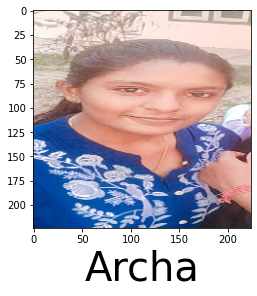

In [ ]:
predictImage("/content/drive/MyDrive/Test/IMG_20220718_145950.png")

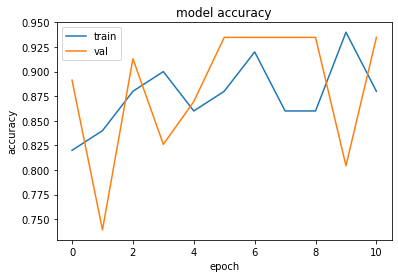

In [ ]:
import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

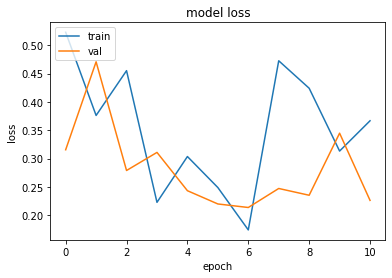

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model_1=tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(filters=20,
                        kernel_size=3,
                        activation="relu",
                        input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(20,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(20,3,activation="relu"),
  tf.keras.layers.Conv2D(20,3,activation="relu"),
  tf.keras.layers.Conv2D(20,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation="sigmoid")]) 

In [ ]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.SGD(0.001),
                metrics=["accuracy"])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [ ]:
history_1=model_1.fit(train_data,
                      epochs=50,
                      steps_per_epoch=50,
                      validation_data=dir_valid,
                      callbacks=[callback])

Epoch 1/50
50/50 [==============================] - 14s 270ms/step - loss: 0.6794 - accuracy: 0.5800 - val_loss: 0.6312 - val_accuracy: 0.9348
Epoch 2/50
50/50 [==============================] - 11s 219ms/step - loss: 0.6233 - accuracy: 0.7400 - val_loss: 0.5630 - val_accuracy: 0.8478
Epoch 3/50
50/50 [==============================] - 11s 224ms/step - loss: 0.5062 - accuracy: 0.8000 - val_loss: 0.4412 - val_accuracy: 0.7391
Epoch 4/50
50/50 [==============================] - 12s 246ms/step - loss: 0.4798 - accuracy: 0.8200 - val_loss: 0.3081 - val_accuracy: 0.8696
Epoch 5/50
50/50 [==============================] - 11s 221ms/step - loss: 0.3594 - accuracy: 0.8800 - val_loss: 0.2519 - val_accuracy: 0.9565
Epoch 6/50
50/50 [==============================] - 11s 222ms/step - loss: 0.3759 - accuracy: 0.8200 - val_loss: 0.7898 - val_accuracy: 0.5217
Epoch 7/50
50/50 [==============================] - 11s 220ms/step - loss: 0.2619 - accuracy: 0.9200 - val_loss: 0.2134 - val_accuracy: 0.9565

In [ ]:
from tensorflow.keras.preprocessing import image
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model.predict(X)
  
  print(val)
  if val<=0.5:
    plt.xlabel("Archa",fontsize=40)
  elif val>0.5:
    plt.xlabel("Sreelakshmi",fontsize=30)

[[1.]]


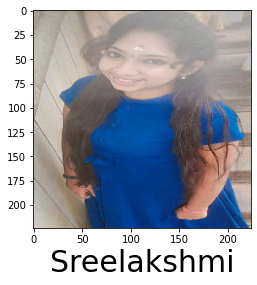

In [ ]:
predictImage("/content/drive/MyDrive/Test/IMG_20220718_150110.png")

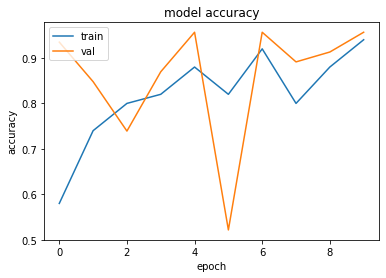

In [ ]:
import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot as plt
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

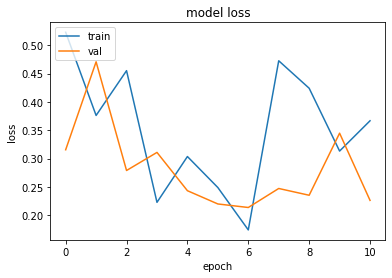

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()